In [1]:
!pip install -q paddlepaddle
!pip install -q paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 47791, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 47791 (delta 47), reused 88 (delta 25), pack-reused 47649
Receiving objects: 100% (47791/47791), 345.39 MiB | 29.96 MiB/s, done.
Resolving deltas: 100% (33578/33578), done.
Updating files: 100% (1892/1892), done.


In [3]:
# import packages
from paddleocr import PaddleOCR, draw_ocr
from IPython import display
from PIL import Image
import requests

# download and load paddle ocr model in local
ocr = PaddleOCR(lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:07<00:00, 506kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:11<00:00, 925kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:15<00:00, 144kiB/s]

[2024/01/29 03:10:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [18]:
image_path = "image.jpg"

result = ocr.ocr(image_path)
result = result[0]
result

[2024/01/29 03:27:16] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/01/29 03:27:16] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.13834738731384277
[2024/01/29 03:27:16] ppocr DEBUG: rec_res num  : 6, elapsed : 0.2175135612487793


[[[[48.0, 280.0], [422.0, 313.0], [412.0, 420.0], [38.0, 387.0]],
  ('Text', 0.9066722393035889)],
 [[[1529.0, 300.0], [2386.0, 348.0], [2376.0, 519.0], [1519.0, 471.0]],
  ('from Image', 0.9813873171806335)],
 [[[628.0, 325.0], [1331.0, 338.0], [1328.0, 458.0], [626.0, 444.0]],
  ('Recognition', 0.9869629144668579)],
 [[[1544.0, 622.0], [1795.0, 635.0], [1788.0, 747.0], [1537.0, 733.0]],
  ('OCR', 0.8792281150817871)],
 [[[480.0, 668.0], [801.0, 693.0], [791.0, 812.0], [470.0, 787.0]],
  ('Using', 0.9789581298828125)],
 [[[924.0, 667.0], [1377.0, 642.0], [1383.0, 739.0], [929.0, 764.0]],
  ('Paddle', 0.9680914878845215)]]

In [21]:
# print predicted text
for res in result:
    print(res[1][0])

Text
from Image
Recognition
OCR
Using
Paddle


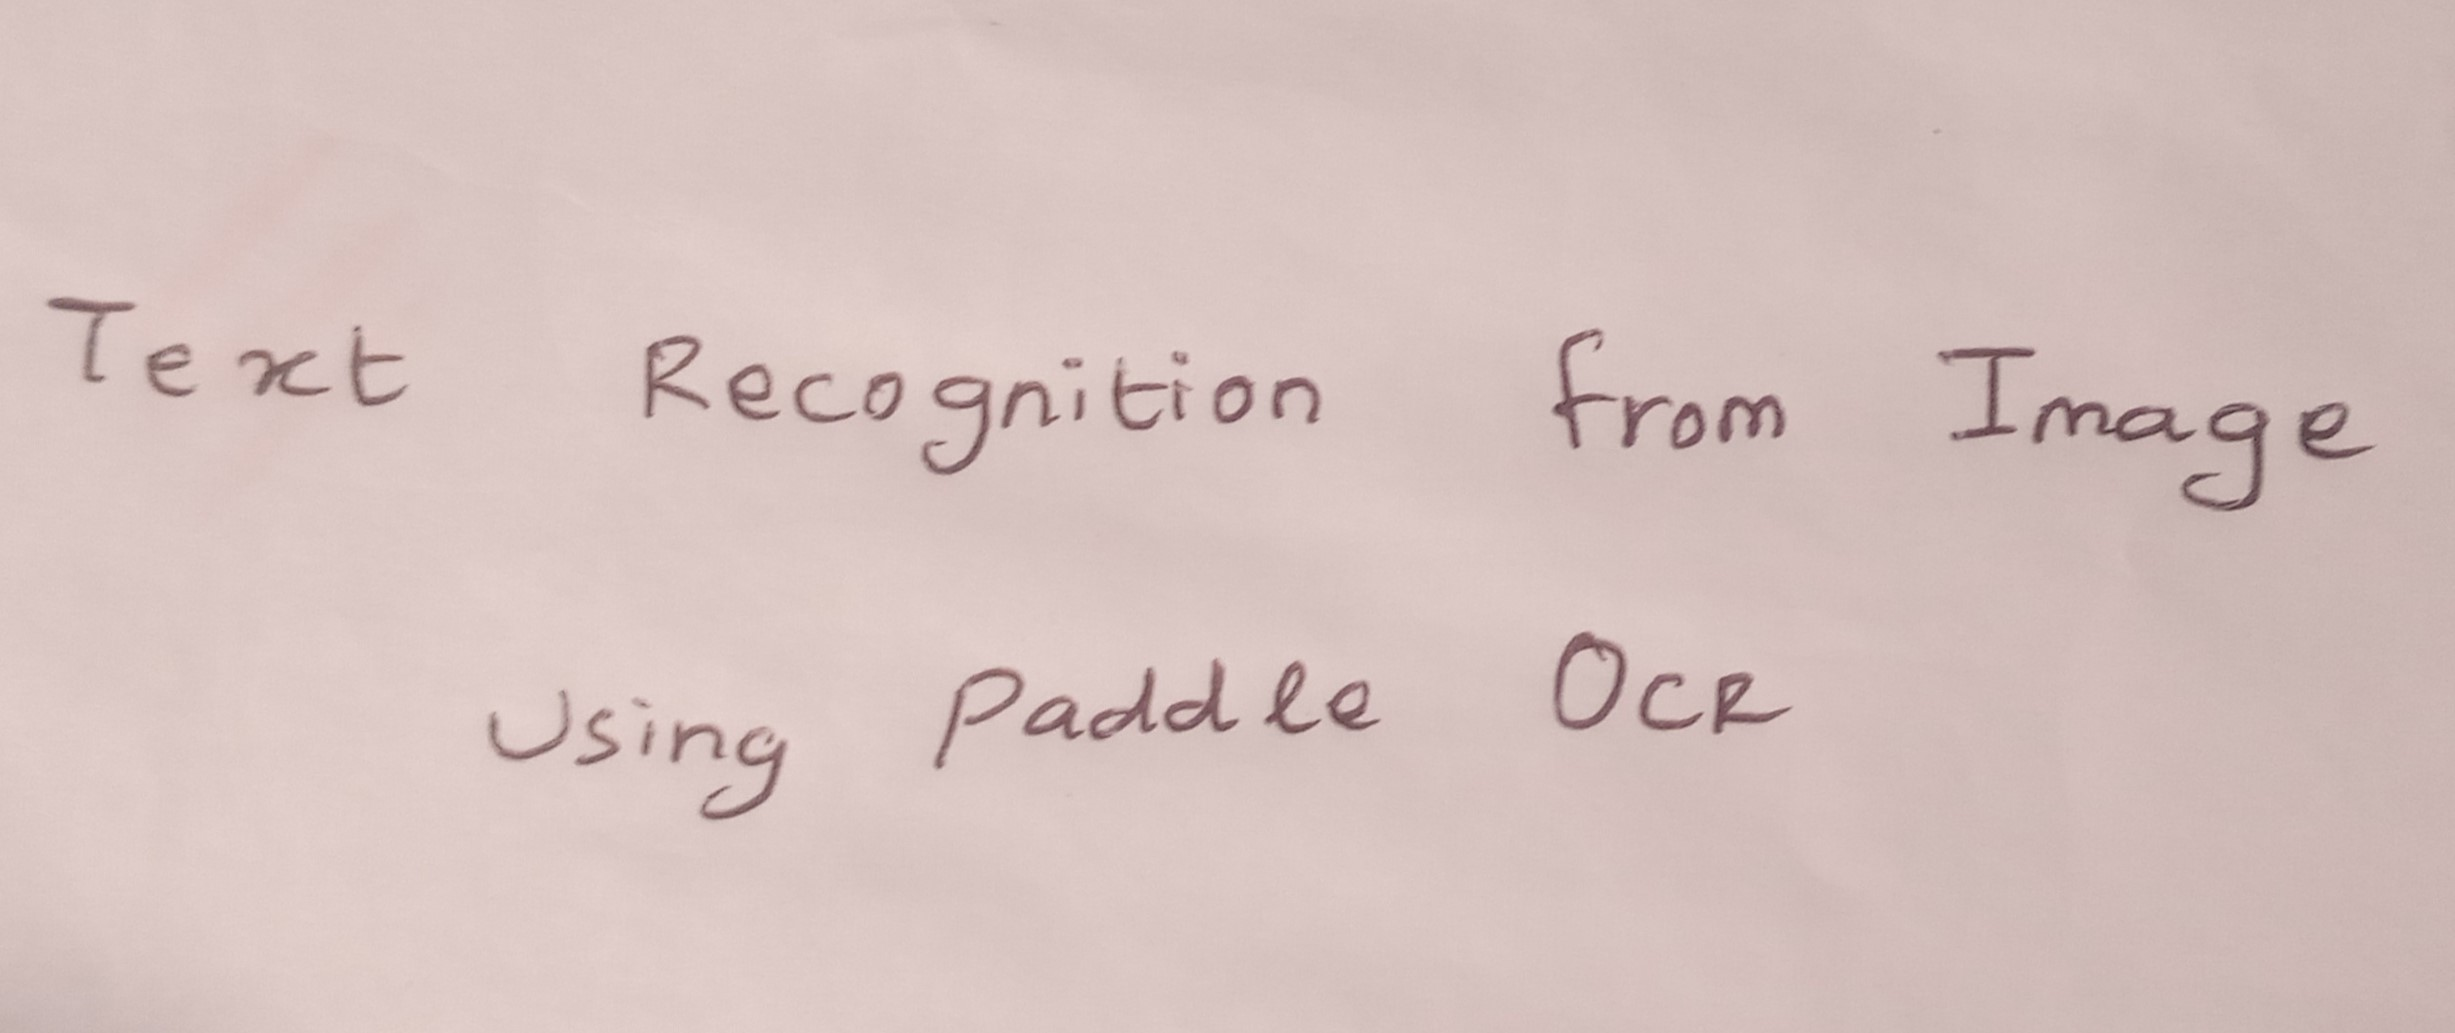

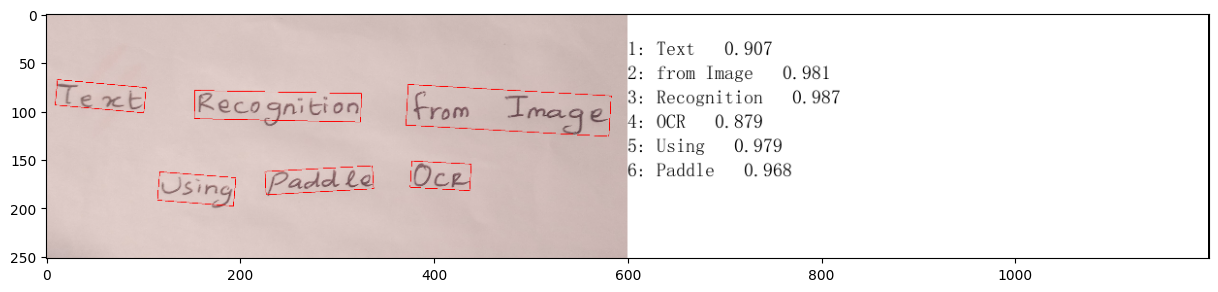

In [20]:
# draw result
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

boxes = [res[0] for res in result]
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

img = cv2.imread(image_path)
cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))
annotated = draw_ocr(img, boxes, texts, scores, font_path='/content/PaddleOCR/doc/fonts/simfang.ttf')
plt.imshow(annotated)